In [17]:
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series,DataFrame
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
%precision 3
sns.set()
import sklearn


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_train, X_test, Y_train, Y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=12)

model = LogisticRegression(random_state=12, solver='liblinear')
model.fit(X_train, Y_train)

results = pd.DataFrame(model.predict_proba(X_test), columns=cancer.target_names)

results.head()

,malignant,benign
0,0.993894,6.105999e-03
1,0.029748,9.702521e-01
2,0.058117,9.418832e-01
3,0.099628,9.003717e-01
4,1.000000,2.210265e-07


In [19]:
for threshold in [0.4, 0.3, 0.15, 0.05]:
    results[f'flag_{threshold}'] = results['benign'].map(lambda x: 1 if x > threshold else 0)

results.head(10)

,malignant,benign,flag_0.4,flag_0.3,flag_0.15,flag_0.05
0,0.993894,6.105999e-03,0,0,0,0
1,0.029748,9.702521e-01,1,1,1,1
2,0.058117,9.418832e-01,1,1,1,1
3,0.099628,9.003717e-01,1,1,1,1
4,1.000000,2.210265e-07,0,0,0,0
5,0.001196,9.988041e-01,1,1,1,1
6,0.999998,2.308888e-06,0,0,0,0
7,0.013484,9.865164e-01,1,1,1,1
8,0.869807,1.301930e-01,0,0,0,1
9,0.923075,7.692505e-02,0,0,0,1


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='false positive rate', ylabel='true positive rate'>

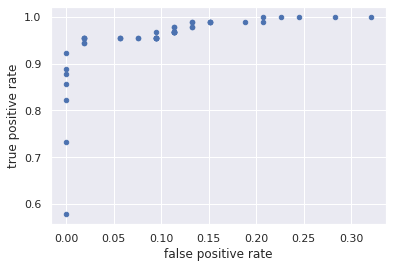

In [20]:
from sklearn.metrics import confusion_matrix

rates = {}
for threshold in np.linspace(0.01, 0.99, num=50):
    labels = results['benign'].map(lambda x : 1 if x > threshold else 0)
    m = confusion_matrix(Y_test, labels)
    rates[threshold] = {'false positive rate' : m[0,1] / m[0, :].sum(),
                                    'true positive rate' : m[1,1] / m[1, :].sum()}

pd.DataFrame(rates).T.plot.scatter('false positive rate', 'true positive rate')

In [21]:
from sklearn import svm
from sklearn.metrics import roc_curve, auc

cancer = load_breast_cancer()

X_train, X_test, Y_train, Y_test = train_test_split(cancer.data, cancer.target, test_size=0.5, random_state=12)

model = svm.SVC(kernel='linear', probability=True, random_state=12)
model.fit(X_train, Y_train)

Y_pred = model.predict_proba(X_test)[:,1]

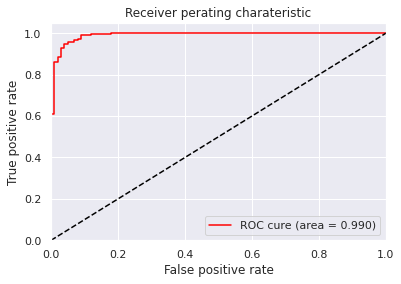

In [13]:
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)

auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='red', label = 'ROC cure (area = %.3f)' % auc)
plt.plot([0, 1], [0, 1], color = 'black', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver perating charateristic')
plt.legend(loc='best')

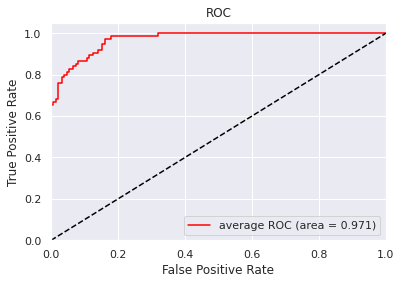

In [25]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize

iris = load_iris()
X = iris.data
Y = iris.target

Y = label_binarize(Y, classes=[0,1,2])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=12)

model = OneVsRestClassifier(SVC(kernel='linear', probability=True, random_state=12))
Y_score = model.fit(X_train, Y_train).predict_proba(X_test)


fpr, tpr, _ = roc_curve(Y_test.ravel(), Y_score.ravel())
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='red', label='average ROC (area = {:.3f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc='best')

0.5777777777777777